# Module 6: WeatherPy

### Importing needed modules

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import time

import requests as req
from config import weather_api_key
from citipy import citipy

### Creating a set of random latitude and longitude combinations, and then creating a list of the two variables

In [55]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
coordinates = list(lat_lngs)

### Creating a list to hold cities, identifying the nearest city for each latitude and longtitude combination, # If the city is unique, then we will add it to the cities list.

In [56]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)

### API Retrieval

Creating an emply list to hold the weather data and creating record / set counters. Looping through the list of cities and building the city URL. Following, an API request is generated for each city and turned into a JSON formed. It then parses through the needed data and appends the data into a city_data dict. If an errior is experioenced when calling the data, the try-except block will skip the city.

In [57]:
city_data = []
print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | vryburg
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | kushima
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | lazaro cardenas
Processing Record 12 of Set 1 | touros
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | alta floresta
Processing Record 15 of Set 1 | el dorado
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | chagda
City not found. Skipping...
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | flinders
Processing Record 22 of Set 

City not found. Skipping...
Processing Record 41 of Set 4 | sri aman
Processing Record 42 of Set 4 | yulara
Processing Record 43 of Set 4 | mayo
Processing Record 44 of Set 4 | den helder
Processing Record 45 of Set 4 | roma
Processing Record 46 of Set 4 | faanui
Processing Record 47 of Set 4 | barrow
Processing Record 48 of Set 4 | tasiilaq
Processing Record 49 of Set 4 | kuche
City not found. Skipping...
Processing Record 50 of Set 4 | homer
Processing Record 1 of Set 5 | adrar
Processing Record 2 of Set 5 | teseney
Processing Record 3 of Set 5 | gusinoye ozero
Processing Record 4 of Set 5 | mataram
Processing Record 5 of Set 5 | mineiros
Processing Record 6 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 5 | cherskiy
Processing Record 8 of Set 5 | blonduos
City not found. Skipping...
Processing Record 9 of Set 5 | kamenka
Processing Record 10 of Set 5 | kismayo
Processing Record 11 of Set 5 | taoudenni
Processing Record 12 of Set 5 | chumikan
Processing

Processing Record 33 of Set 8 | mezhova
Processing Record 34 of Set 8 | tezu
Processing Record 35 of Set 8 | clarksburg
Processing Record 36 of Set 8 | mbanza-ngungu
Processing Record 37 of Set 8 | saint george
Processing Record 38 of Set 8 | kununurra
Processing Record 39 of Set 8 | yarim
Processing Record 40 of Set 8 | santa cruz de la palma
Processing Record 41 of Set 8 | zeya
Processing Record 42 of Set 8 | souillac
Processing Record 43 of Set 8 | paita
Processing Record 44 of Set 8 | pano polemidia
Processing Record 45 of Set 8 | ocos
Processing Record 46 of Set 8 | ginir
Processing Record 47 of Set 8 | pendra
Processing Record 48 of Set 8 | manta
Processing Record 49 of Set 8 | saleaula
City not found. Skipping...
Processing Record 50 of Set 8 | rio grande
Processing Record 1 of Set 9 | mulege
Processing Record 2 of Set 9 | flic en flac
Processing Record 3 of Set 9 | tra vinh
Processing Record 4 of Set 9 | zhezkazgan
Processing Record 5 of Set 9 | macherla
Processing Record 6 of 

Processing Record 20 of Set 12 | sindor
Processing Record 21 of Set 12 | kijang
Processing Record 22 of Set 12 | sorong
Processing Record 23 of Set 12 | montbrison
Processing Record 24 of Set 12 | nelson bay
Processing Record 25 of Set 12 | highland springs
Processing Record 26 of Set 12 | manadhoo
Processing Record 27 of Set 12 | roald
Processing Record 28 of Set 12 | fare
Processing Record 29 of Set 12 | nador
Processing Record 30 of Set 12 | prachuap khiri khan
Processing Record 31 of Set 12 | okha
Processing Record 32 of Set 12 | ulaangom
Processing Record 33 of Set 12 | san cristobal
Processing Record 34 of Set 12 | thomasville
Processing Record 35 of Set 12 | tiarei
Processing Record 36 of Set 12 | puerto del rosario
Processing Record 37 of Set 12 | kearney
Processing Record 38 of Set 12 | kurchum
Processing Record 39 of Set 12 | arroyo
Processing Record 40 of Set 12 | bethanien
Processing Record 41 of Set 12 | aquiraz
Processing Record 42 of Set 12 | wad rawah
Processing Record 

### Creating a dataframe for retrieved data, and outputing into a CSV

In [58]:
city_data_df = pd.DataFrame(city_data)
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2020-06-24 19:55:47,72.79,-56.15,34.86,88,46,1.32
1,Vryburg,ZA,2020-06-24 19:55:47,-26.96,24.73,48.33,47,0,5.84
2,Rikitea,PF,2020-06-24 19:55:47,-23.12,-134.97,70.47,55,100,8.63
3,New Norfolk,AU,2020-06-24 19:55:47,-42.78,147.06,50.00,93,43,1.57
4,Qaanaaq,GL,2020-06-24 19:55:47,77.48,-69.36,40.35,71,57,9.10
5,Hermanus,ZA,2020-06-24 19:55:48,-34.42,19.23,61.03,65,0,2.66
6,Kushima,JP,2020-06-24 19:55:48,31.46,131.23,73.40,83,90,3.36
7,East London,ZA,2020-06-24 19:55:48,-33.02,27.91,69.48,27,0,7.14
8,Tiksi,RU,2020-06-24 19:55:48,71.69,128.87,62.67,52,22,3.74
9,Lazaro Cardenas,MX,2020-06-24 19:55:48,17.96,-102.20,86.40,63,16,14.38


In [59]:
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Extracting data for plotting

In [62]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
today = time.time()
today = time.strftime("%x")

### Plotting the City Latitude vs Max Temp

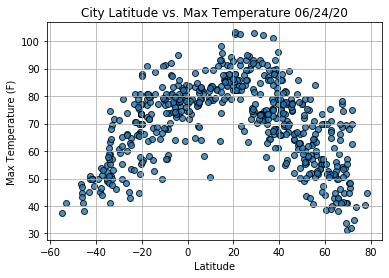

In [66]:
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig1.png")

plt.show()

### Ploting City Latitude vs Humidity

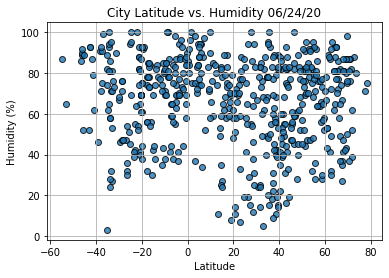

In [67]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig2.png")

plt.show()

### Plotting City Latitude vs cloudiness

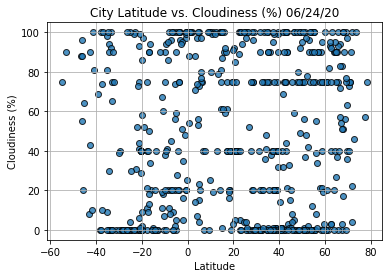

In [68]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig3.png")

plt.show()

### Plotting City Latitude vs Wind Speed

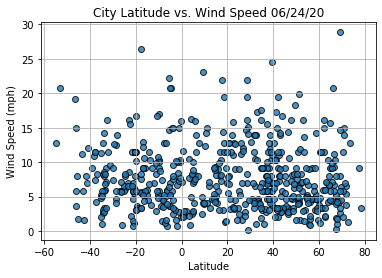

In [69]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig4.png")

plt.show()